# Demo: Image Manipulation in OpenCV

---

Prof. Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

Parts of the following notebook are based on https://medium.com/analytics-vidhya/introduction-to-opencv-cc771730577a, https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html and https://towardsdatascience.com/cutout-detection-in-2-minutes-using-opencv-python-90f89d7c0f81

In [1]:
# imports
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np 
import cv2

## Loading and displaying images

In [2]:
# load image (you may have to adapt the path to the image!)
input_img = cv2.imread ('../images/GrandCanyon.jpg', 1)  # flag 1 indicates we want a colour picture

# convert image: matplotlib expects image in RGB format, but OpenCV provides it in BGR
img_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Grand Canyon')

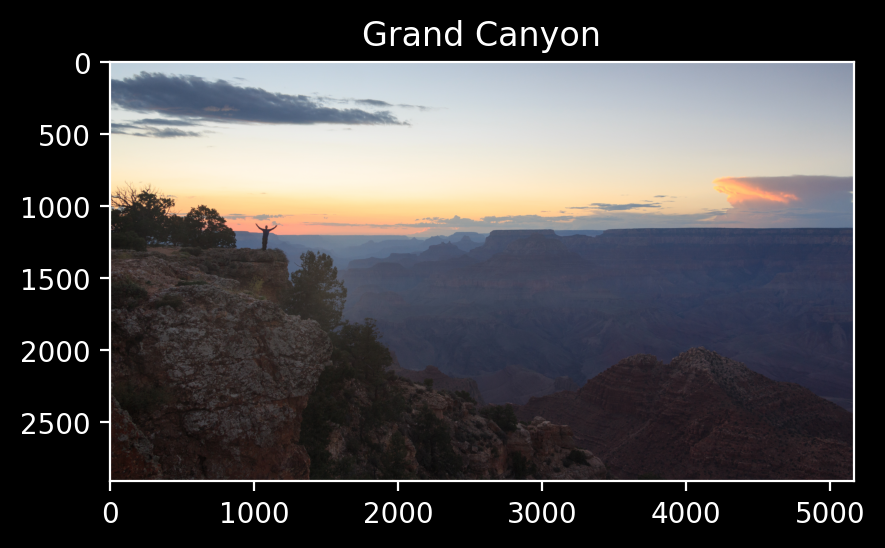

In [5]:
plt.imshow(img_RGB)
plt.title('Grand Canyon')

We can find out basic image properties as follows:

In [6]:
print(img_RGB.size)
print(img_RGB.shape)
print(img_RGB.dtype)

45037188
(2906, 5166, 3)
uint8


## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [1]:
# get a single pixel
pixel = img_RGB[100,100]
print(pixel)

[197 212 219]


In [13]:
# set new pixel value
img_RGB[100,100] = [0,0,0]
pixelnew = img_RGB[100,100]
print(pixelnew)

[0 0 0]


## Getting and setting regions of an image (slicing)

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on. 

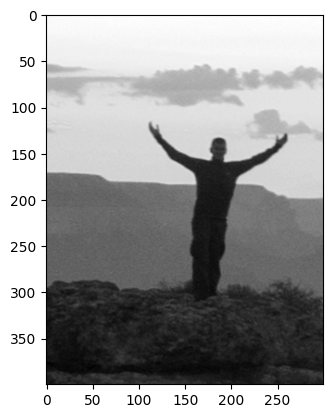

In [14]:
# make a cutout
cutout_RGB = img_RGB[1000:1400, 900:1200]
cutout = cv2.cvtColor(cutout_RGB, cv2.COLOR_RGB2GRAY)
plt.imshow(cutout, cmap='gray') # cmap='gray' is used to display the image in grayscale

400
300


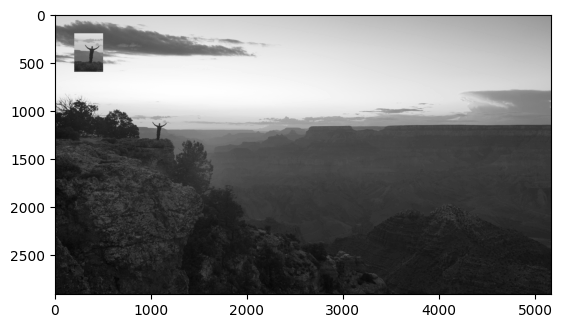

In [15]:
# fresh copy for modification
fresh_image = img_gray.copy() 

# paste cutout in fresh copy                            
fresh_image[200:200+cutout.shape[0], 200:200+cutout.shape[1]]=cutout
print(cutout.shape[0])
print(cutout.shape[1])
plt.imshow(fresh_image, cmap='gray')

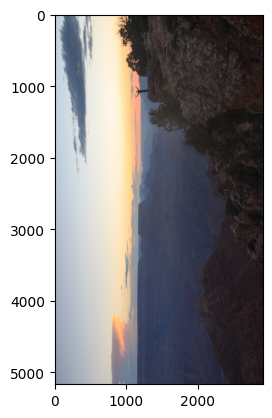

In [16]:
# transpose image
transposed=cv2.transpose(img_RGB)
plt.imshow(transposed)

## Minimum, maximum

To find the min or max of a matrix, you can use minMaxLoc. This takes a single channel image (it doesn't make much sense to take the max of a 3 channel image). So in the next code snippet you see a for loop, using python style image slicing, to look at each channel of the input image separately. 

In [17]:
# image slicing to separate color channels and determine min and max per channel
for i in range(0,3):
   # note that we get 4 return values from this function
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(img_RGB[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))

min 0.0 is at (100, 100), and max 255.0 is at (600, 715)
min 0.0 is at (100, 100), and max 248.0 is at (1287, 749)
min 0.0 is at (100, 100), and max 236.0 is at (1293, 495)


## Arithmetic operations on images

OpenCV has a lot of functions for doing mathematics on images. Some of these have "analogous" numpy alternatives, but it is nearly always better to use the OpenCV version. The reason for this that OpenCV is designed to work on images and so handles overflow better (OpenCV add, for example, truncates to 255 if the datatype is image-like and 8 bit; Numpy's alternative wraps around).

Useful arithmetic operations include add and addWeighted, which combine two images that are the same size. 

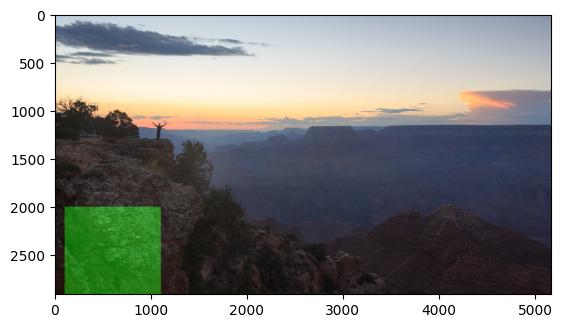

In [18]:
# create an empty image the same size as our input
blank_image = np.zeros((img_RGB.shape), np.uint8)

# color part of the image 
blank_image[2000:3000,100:1100,1]=100; #give it a green square (0=b, 1=g, 2=r)
blank_image = cv2.cvtColor(blank_image, cv2.COLOR_BGR2RGB)

# combine the two images
# note that OpenCV detects automatically boundary conditions and clips the image if necessary!
new_image=cv2.add(blank_image,img_RGB) 

# plot the result
plt.imshow(new_image)

## Drawing on images

Similarly, we can draw lines, boxes etc. on images like this:

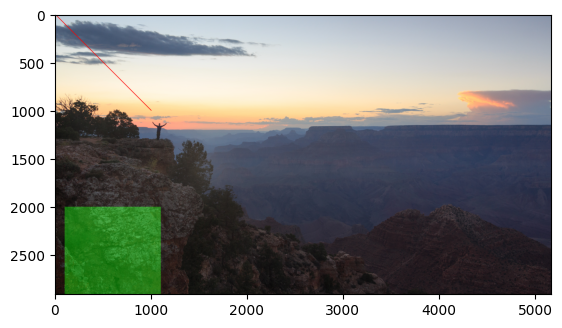

In [19]:
# draw a red line
new_image = cv2.line(new_image,
                   pt1=(10, 10),
                   pt2=(1000, 1000),
                   color=(255, 0, 0),
                   thickness=5)

plt.imshow(new_image)

## Resizing images

Image resizing can be done using different interpolation algorithms as follows:

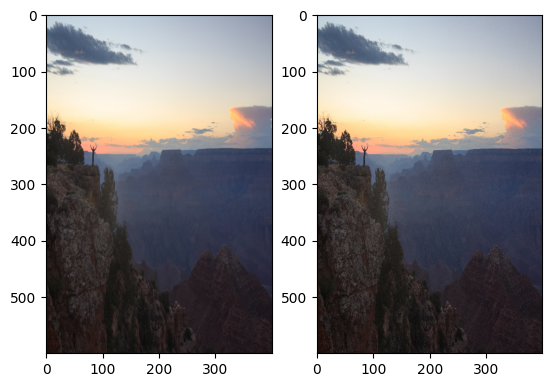

In [20]:
# resizing with two different interpolation methods
interpolation_area = cv2.resize(img_RGB,
                               (400, 600),
                               interpolation = cv2.INTER_AREA)
    
interpolation_nearest = cv2.resize(img_RGB,
                               (400, 600),
                               interpolation=cv2.INTER_NEAREST)

# plot results
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(interpolation_area)
ax2.imshow(interpolation_nearest)

## Plotting 3d intensity images

We can interpret an image as a function $I:[a,b]\times [c,d] \rightarrow [0, 255]$ and plot the resulting intensity like this:

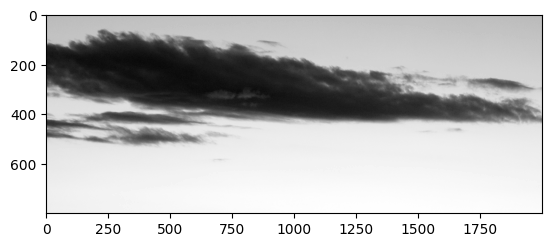

In [21]:
# cut another area
cloud = img_gray[0:800, 0:2000]
plt.imshow(cloud, 'gray')

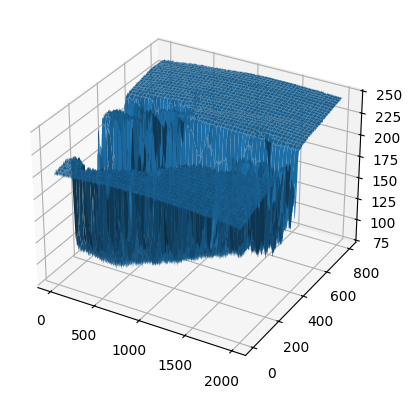

In [22]:
# plot surface map using meshgrid
plt.figure(3)

ax = plt.axes(projection='3d')

y = range(cloud.shape[0])
x = range(cloud.shape[1]) 
X, Y = np.meshgrid(x, y)

ax.plot_surface( X, Y, cloud)